# SHAP Interpretation

In [1]:
import shap
import pandas as pd
import keras
from sklearn.preprocessing import *
import numpy as np
Minmaxsc  = MinMaxScaler(feature_range=(0, 1))
Minmaxsc2  = MinMaxScaler(feature_range=(0, 1))
Stdsc  = StandardScaler()
Stdsc2  = StandardScaler()
MAsc  = MaxAbsScaler()
MAsc2  = MaxAbsScaler()
Rsc  = RobustScaler()
Rsc2  = RobustScaler()

In [2]:
database=pd.read_csv('processed_database.csv')
data_output_full=database.iloc[:,1]
data_input_full=database.iloc[:,2:]
data_input_full_ANN=Stdsc.fit_transform(data_input_full)
data_output_full_ANN=Stdsc2.fit_transform(np.array(data_output_full).reshape(-1,1))

In [3]:
data_input_full_ANN_for_shap=pd.DataFrame(data_input_full_ANN,columns=data_input_full.columns)

In [4]:
model=keras.models.load_model("Alkaline_ORR.h5")

In [5]:
from keras.models import load_model
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import plot_partial_dependence
from sklearn.utils.validation import check_is_fitted

# Define a new class that inherits from sklearn's base estimator classes.
class KerasPDPWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model
        self.fitted_ = True  # Indicate that the model is already fitted
    def fit(self, X, y=None):
        # Do nothing, the model is already trained
        return self
    def predict(self, X, y=None):
        return self.model.predict(X)

# Create an instance of the wrapper with the Keras model.
PDP_model = load_model("Alkaline_ORR.h5")
PDP_wrapped_model = KerasPDPWrapper(PDP_model)


In [6]:
data_input_full_ANN_for_shap

,Element_1 Relative Atomic Mass,Element_1 Atomic Number,Element_1 Period,Element_1 Group,Element_1 Ionization Potential,Element_1 Electronegativity,Element_1 Number of d electrons,Element_1 Atomic Radius,Element_2 Relative Atomic Mass,Element_2 Atomic Number,...,Judge_Electrospin,Judge_Hydrothermal,Judge_Microwave,Judge_Spray,Judge_Phys_Chem_Deposition,Judge_Light_Deposition,Judge_Electrochemical_Deposition,Judge_Electrochemical_Corrosion,Judge_Etching,Judge_Sol_Gel
0,-0.389988,-0.402936,-0.429163,0.380954,0.331200,0.325528,-0.419998,-0.444306,0.591327,0.612501,...,-0.157181,-0.286335,-0.075985,0.0,1.938959,0.0,-0.113096,-0.047974,-0.259619,-0.047974
1,-0.389988,-0.402936,-0.429163,0.380954,0.331200,0.325528,-0.419998,-0.444306,0.473307,0.523274,...,-0.157181,-0.286335,-0.075985,0.0,-0.515741,0.0,-0.113096,-0.047974,-0.259619,-0.047974
2,-0.389988,-0.402936,-0.429163,0.380954,0.331200,0.325528,-0.419998,-0.444306,-1.125710,-1.172040,...,-0.157181,-0.286335,-0.075985,0.0,-0.515741,0.0,-0.113096,-0.047974,-0.259619,-0.047974
3,-0.389988,-0.402936,-0.429163,0.380954,0.331200,0.325528,-0.419998,-0.444306,0.438642,0.434047,...,-0.157181,-0.286335,-0.075985,0.0,-0.515741,0.0,-0.113096,-0.047974,-0.259619,-0.047974
4,3.380137,3.415868,2.979358,-0.883890,-1.917834,-1.478240,3.488319,2.571324,-1.201995,-1.261267,...,-0.157181,3.492416,-0.075985,0.0,1.938959,0.0,-0.113096,-0.047974,-0.259619,-0.047974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,1.298368,1.366754,1.843184,-2.570348,-2.003395,-2.537597,1.534160,1.806164,-1.049528,-1.082812,...,-0.157181,-0.286335,-0.075985,0.0,-0.515741,0.0,-0.113096,-0.047974,-0.259619,-0.047974
867,-0.389988,-0.402936,-0.429163,0.380954,0.331200,0.325528,-0.419998,-0.444306,0.591327,0.612501,...,-0.157181,-0.286335,-0.075985,0.0,-0.515741,0.0,-0.113096,-0.047974,-0.259619,-0.047974
868,-0.389988,-0.402936,-0.429163,0.380954,0.331200,0.325528,-0.419998,-0.444306,-1.125710,-1.172040,...,-0.157181,-0.286335,-0.075985,0.0,-0.515741,0.0,-0.113096,-0.047974,-0.259619,-0.047974
869,-0.389988,-0.402936,-0.429163,0.380954,0.331200,0.325528,-0.419998,-0.444306,0.473307,0.523274,...,-0.157181,-0.286335,-0.075985,0.0,-0.515741,0.0,-0.113096,-0.047974,-0.259619,-0.047974


In [7]:
# compute SHAP values
explainer = shap.Explainer(model, data_input_full_ANN)
shap_values = explainer(data_input_full_ANN_for_shap)

Permutation explainer: 872it [00:48, 16.22it/s]                                                                        


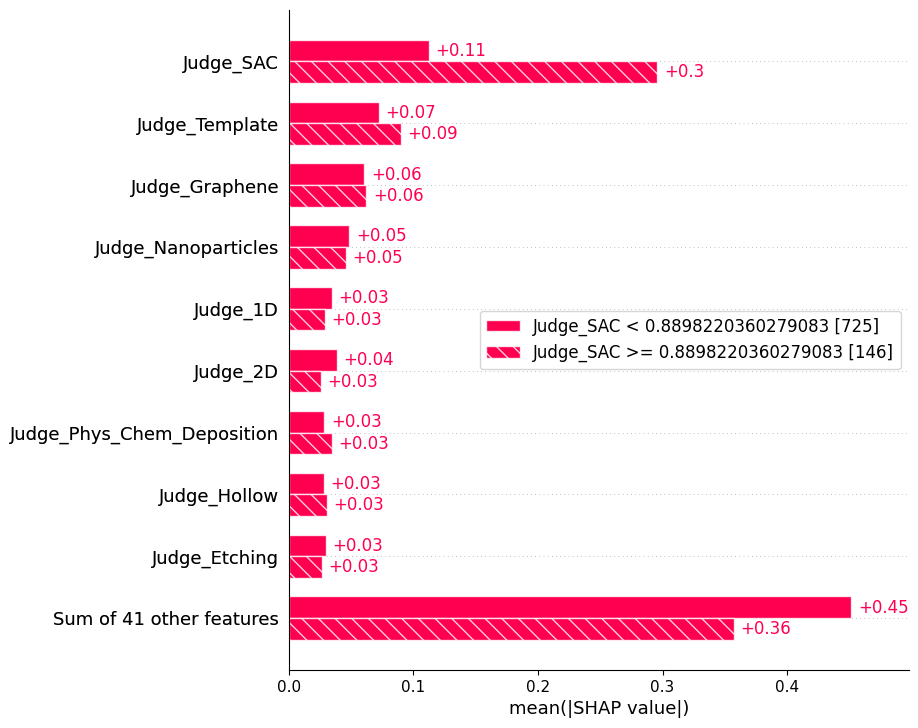

In [8]:
# Extract the values from the 64th feature onwards
sliced_values = shap_values.values[:, 64:]

# Create a new Explanation object with the sliced values
sliced_shap_values = shap.Explanation(values=sliced_values, data=shap_values.data[:, 64:], feature_names=shap_values.feature_names[64:])

# Calculate the absolute mean
cohorts = sliced_shap_values.cohorts(2).abs.mean(0)

# Create the bar plot
shap.plots.bar(cohorts)

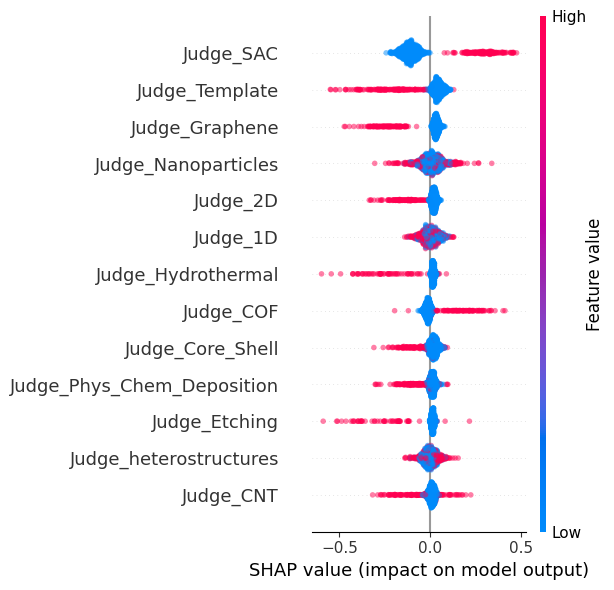

In [9]:
shap.summary_plot(shap_values[:,64:],feature_names=list(data_input_full.columns)[64:],max_display=13,alpha=0.5,plot_size=[6,6])

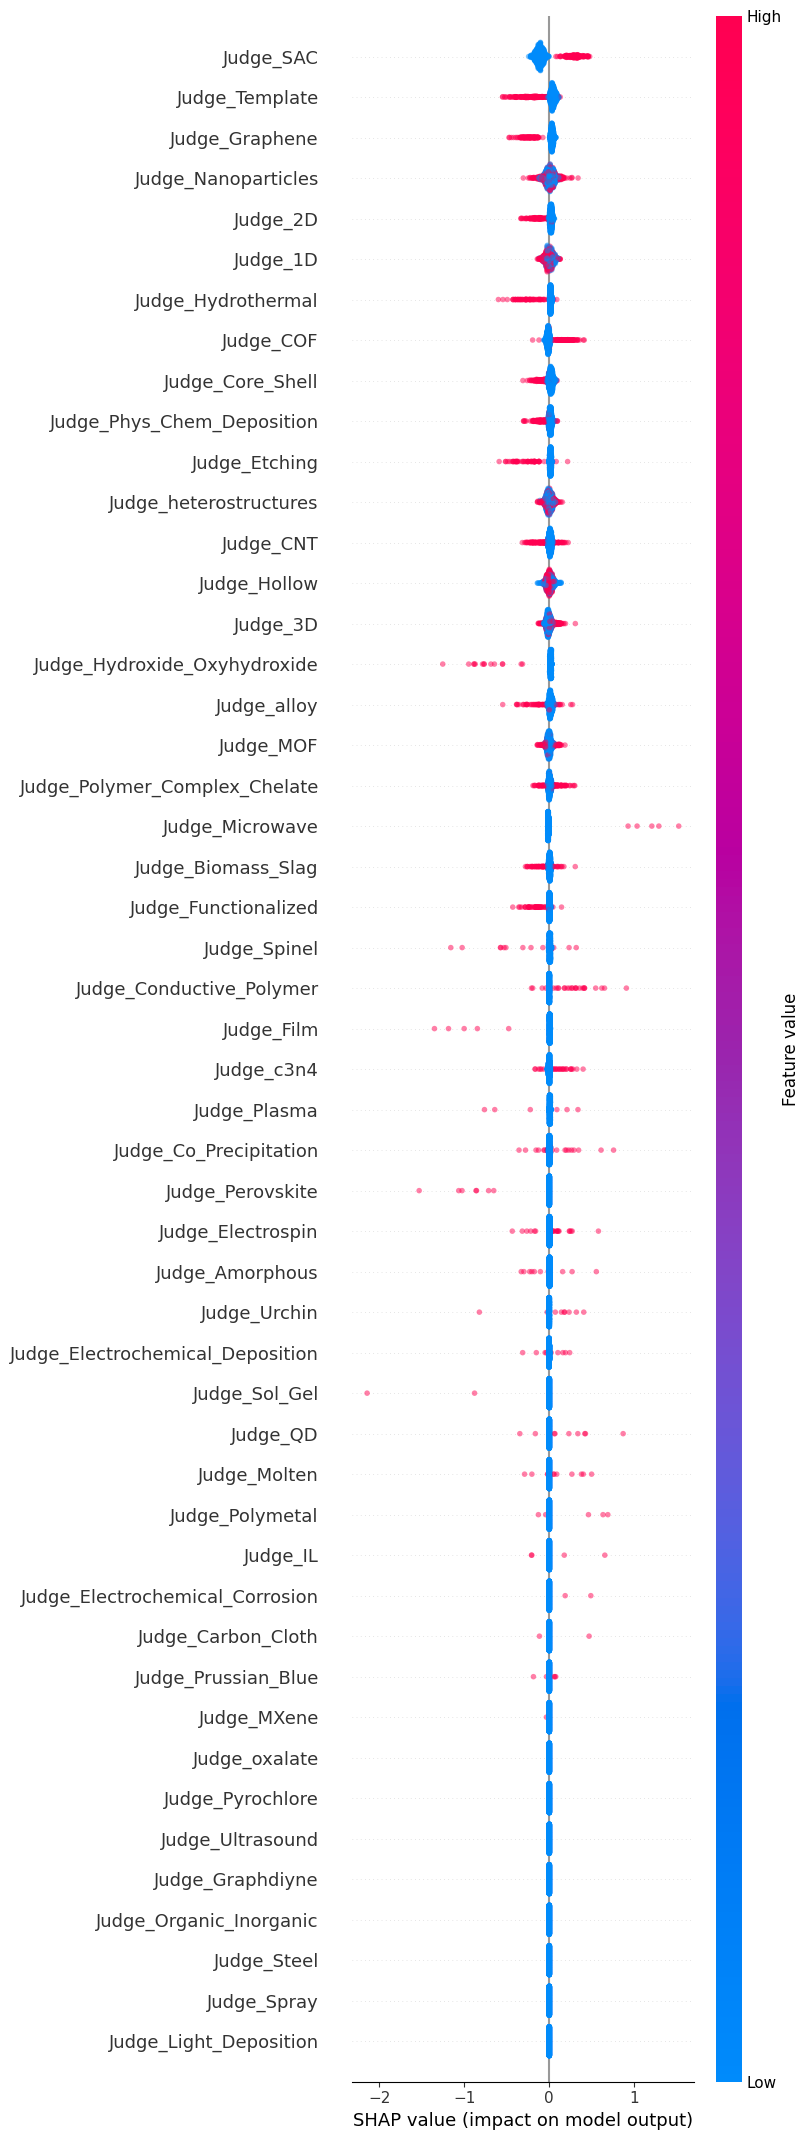

In [10]:
shap.summary_plot(shap_values[:,64:],feature_names=list(data_input_full.columns)[64:],max_display=100,alpha=0.5)

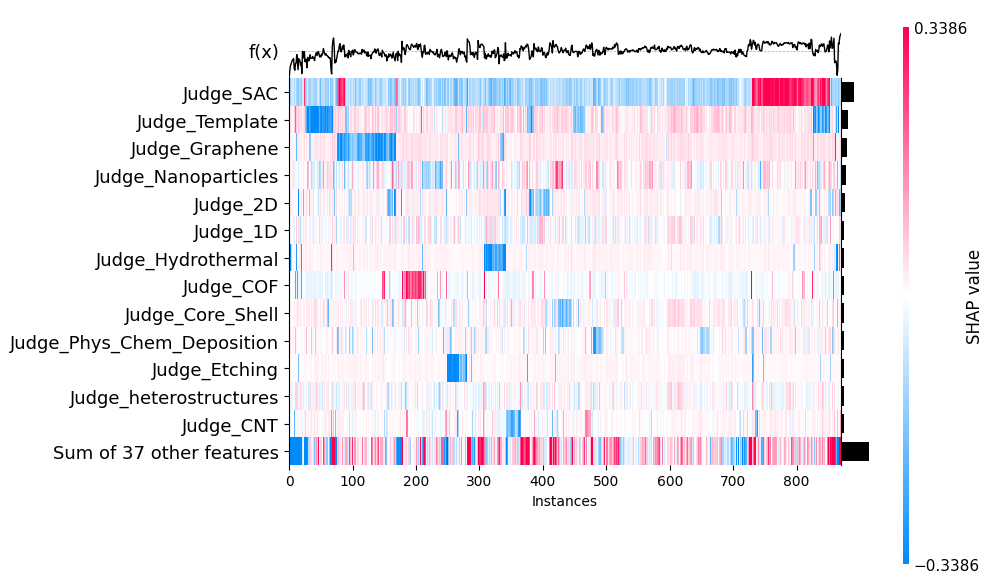

In [11]:
# shap.summary_plot(shap_values[:,64:],feature_names=list(data_input_full.columns)[64:],max_display=15,alpha=0.5)
shap.plots.heatmap(shap_values[:,64:],max_display=14)

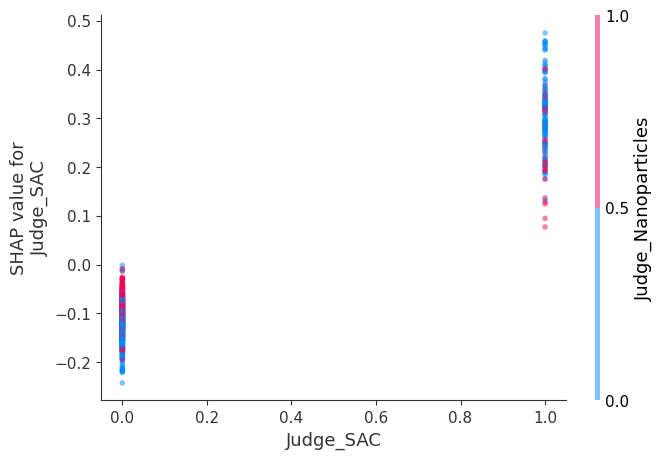

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


28/28 [==============================] - 0s 1ms/step


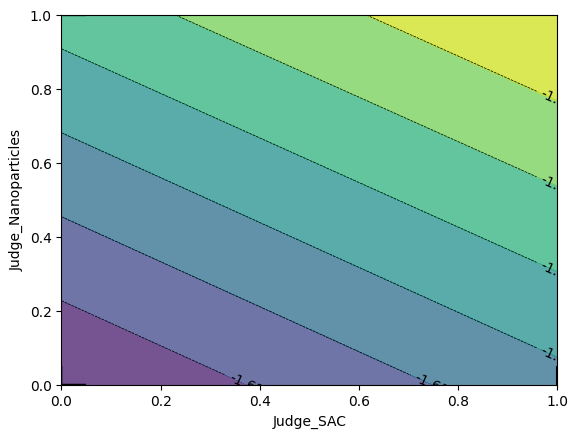

In [12]:
shap.dependence_plot('Judge_SAC',shap_values.values,data_input_full,interaction_index='Judge_Nanoparticles',alpha=0.5)
# Plot the partial dependence.
plot_partial_dependence(PDP_wrapped_model, data_input_full, [('Judge_SAC','Judge_Nanoparticles')], grid_resolution=50)

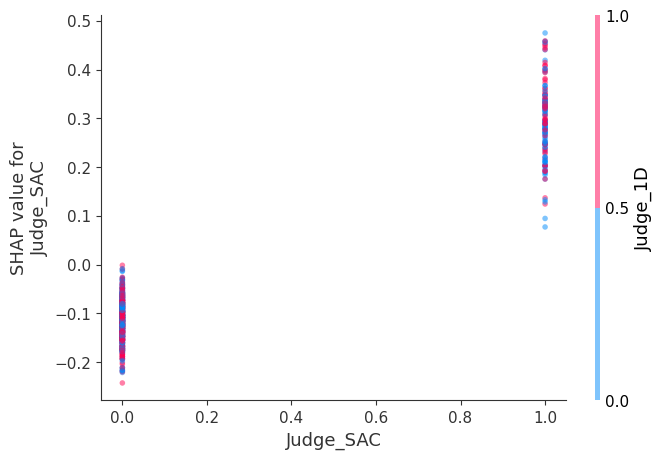

 1/28 [>.............................] - ETA: 0s

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


28/28 [==============================] - 0s 622us/step


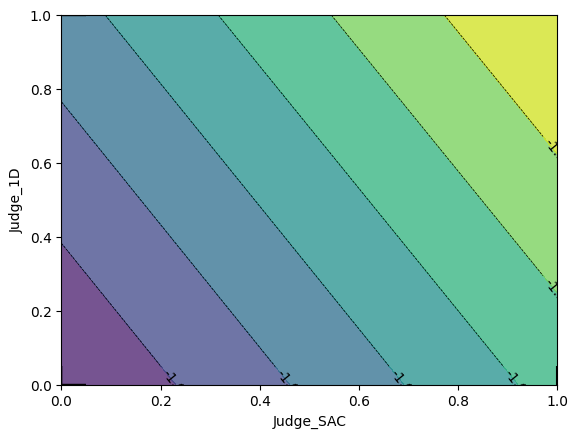

In [13]:
shap.dependence_plot('Judge_SAC',shap_values.values,data_input_full,interaction_index='Judge_1D',alpha=0.5)
# Plot the partial dependence.
plot_partial_dependence(PDP_wrapped_model, data_input_full, [('Judge_SAC','Judge_1D')], grid_resolution=50)

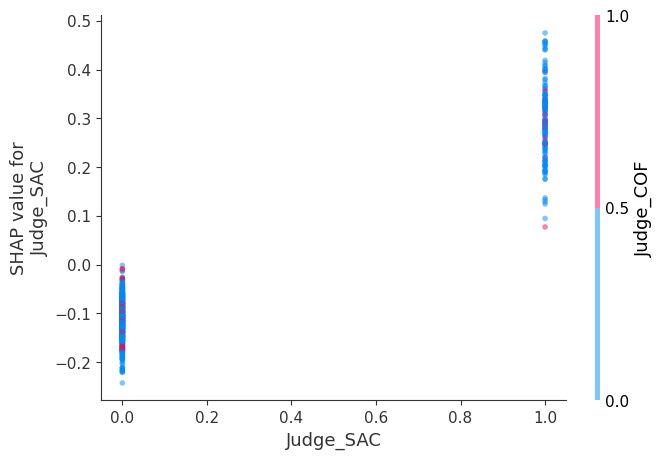

 1/28 [>.............................] - ETA: 0s

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


28/28 [==============================] - 0s 541us/step


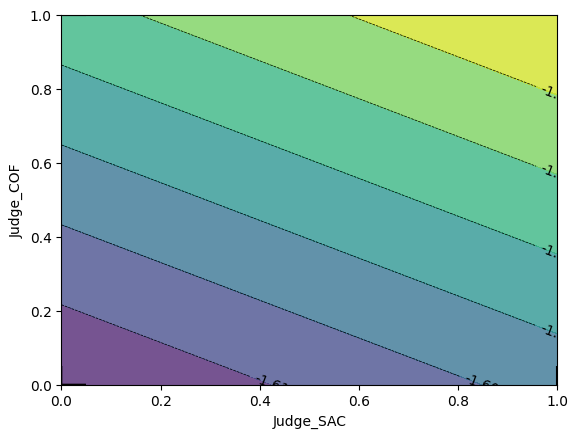

In [14]:
shap.dependence_plot('Judge_SAC',shap_values.values,data_input_full,interaction_index='Judge_COF',alpha=0.5)
# Plot the partial dependence.
plot_partial_dependence(PDP_wrapped_model, data_input_full, [('Judge_SAC','Judge_COF')], grid_resolution=50)

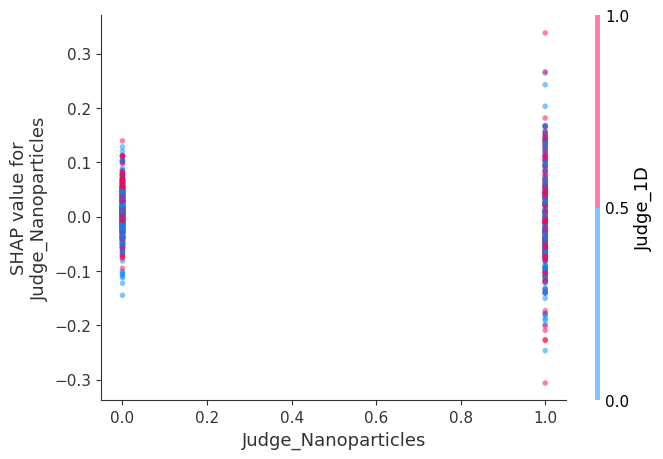

 1/28 [>.............................] - ETA: 0s

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


28/28 [==============================] - 0s 682us/step


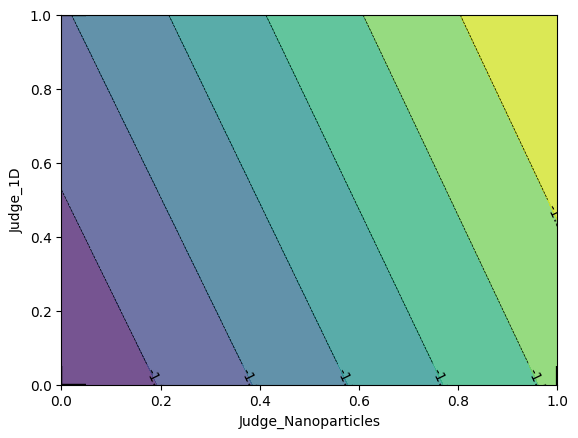

In [15]:
shap.dependence_plot('Judge_Nanoparticles',shap_values.values,data_input_full,interaction_index='Judge_1D',alpha=0.5)
# Plot the partial dependence.
plot_partial_dependence(PDP_wrapped_model, data_input_full, [('Judge_Nanoparticles','Judge_1D')], grid_resolution=50)

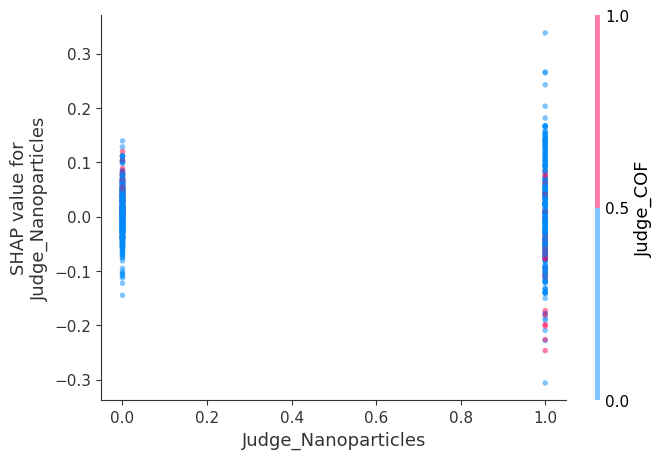

 1/28 [>.............................] - ETA: 0s

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


28/28 [==============================] - 0s 481us/step


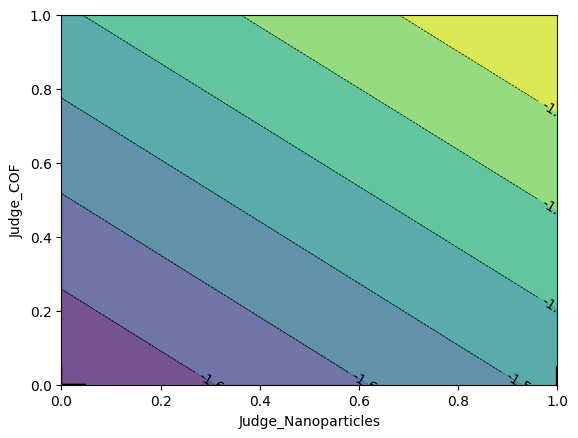

In [16]:
shap.dependence_plot('Judge_Nanoparticles',shap_values.values,data_input_full,interaction_index='Judge_COF',alpha=0.5)
# Plot the partial dependence.
plot_partial_dependence(PDP_wrapped_model, data_input_full, [('Judge_Nanoparticles','Judge_COF')], grid_resolution=50)

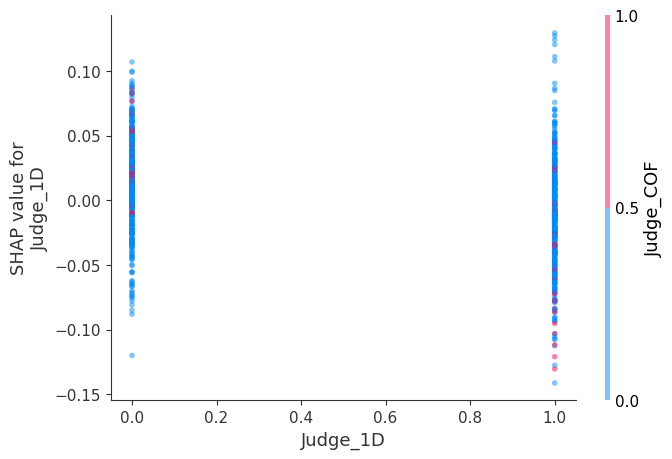

 1/28 [>.............................] - ETA: 0s

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


28/28 [==============================] - 0s 523us/step


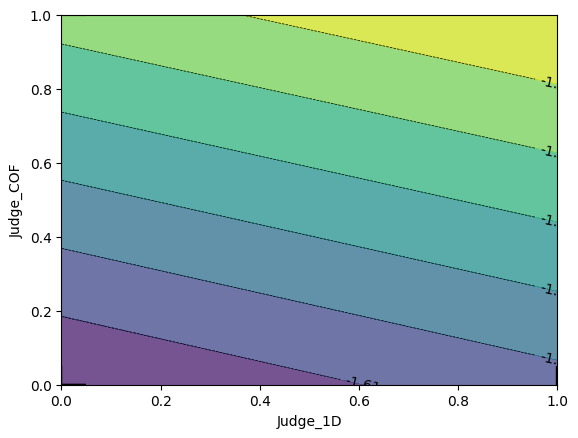

In [17]:
shap.dependence_plot('Judge_1D',shap_values.values,data_input_full,interaction_index='Judge_COF',alpha=0.5)
# Plot the partial dependence.
plot_partial_dependence(PDP_wrapped_model, data_input_full, [('Judge_1D','Judge_COF')], grid_resolution=50)

In [ ]:
#####clustered plot#####
clustering = shap.utils.hclust(data_input_full_ANN, data_output_full_ANN) 
shap.plots.bar(shap_values, max_display=15,clustering=clustering,clustering_cutoff=0.5)

In [ ]:
from sklearn.inspection import partial_dependence
def compute_pdp_importances(model, X):
    pdp_importances = []
    for feature_idx in range(X.shape[1]):
        pdp_results, _ = partial_dependence(model, X, [feature_idx], grid_resolution=50)
        pdp_range = np.max(pdp_results) - np.min(pdp_results)
        pdp_importances.append(pdp_range)
    return np.array(pdp_importances)

In [ ]:
# Compute PDP importances
pdp_importances = compute_pdp_importances(PDP_wrapped_model, data_input_full_ANN_for_shap)

# Create a DataFrame to pair importances with feature names
importances_df = pd.DataFrame({
    'feature': data_input_full_ANN_for_shap.columns,
    'importance': pdp_importances
})

# Filter for only features after the 64th
importances_df = importances_df.iloc[64:]

# Sort importances
importances_df = importances_df.sort_values(by='importance')

# Plot
plt.figure(figsize=(9, 18))
plt.barh(range(importances_df.shape[0]), importances_df['importance'])
plt.yticks(range(importances_df.shape[0]), importances_df['feature'])
plt.xlabel('Partial Dependence Importance')
plt.show()